In [1]:
# Import pandas library for data manipulation and analysis
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import matplotlib's pyplot for creating static visualizations
import matplotlib.pyplot as plt
# Import seaborn, a statistical data visualization library based on matplotlib
import seaborn as sns

In [2]:
path_train = 'C:/Users/shaya/Downloads/Compressed/house-prices-advanced-regression-techniques/train.csv'
path_test = 'C:/Users/shaya/Downloads/Compressed/house-prices-advanced-regression-techniques/test.csv'

In [3]:
# Load the training dataset from the specified path
train_df = pd.read_csv(path_train)
# Load the testing dataset from the specified path
test_df = pd.read_csv(path_test)

In [4]:
# Print the dimensions of the training dataset
print("Train shape: ", train_df.shape)
# Print the dimensions of the test dataset
print("Test shape: ", test_df.shape)
# Display the first few rows of the training dataset to inspect its structure
train_df.head()

Train shape:  (1460, 81)
Test shape:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Display information about the train_df DataFrame
# This shows the number of rows, columns, column names, non-null values, and data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Calculate the number of missing values in each column of the train_df DataFrame
missing = train_df.isnull().sum()

# Filter to only show columns with missing values (> 0)
# Sort them in descending order to see columns with most missing values first
missing[missing > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [7]:
# Generate descriptive statistics for the training dataframe
# This shows count, mean, std, min, 25%, 50%, 75%, max for each numeric column
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


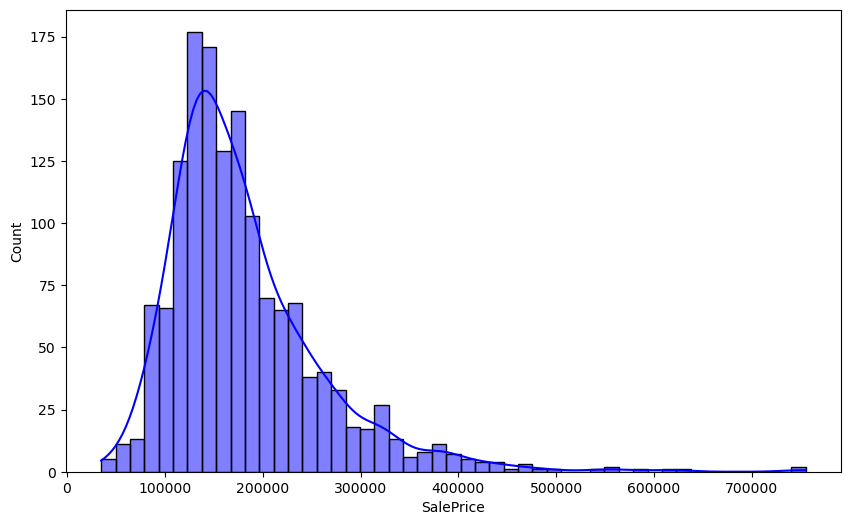

In [8]:
# Create a figure with specified size (10 inches width, 6 inches height)
plt.figure(figsize=(10, 6))
# Create a histogram of the 'SalePrice' column from train_df
# kde=True adds a kernel density estimate curve
# color='blue' sets the histogram color to blue
sns.histplot(train_df['SalePrice'], kde=True, color='blue')
# Display the plot
plt.show()

In [9]:
# Apply log transformation (log(x+1)) to the SalePrice column to normalize its distribution
# This helps with skewed data and can improve model performance
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

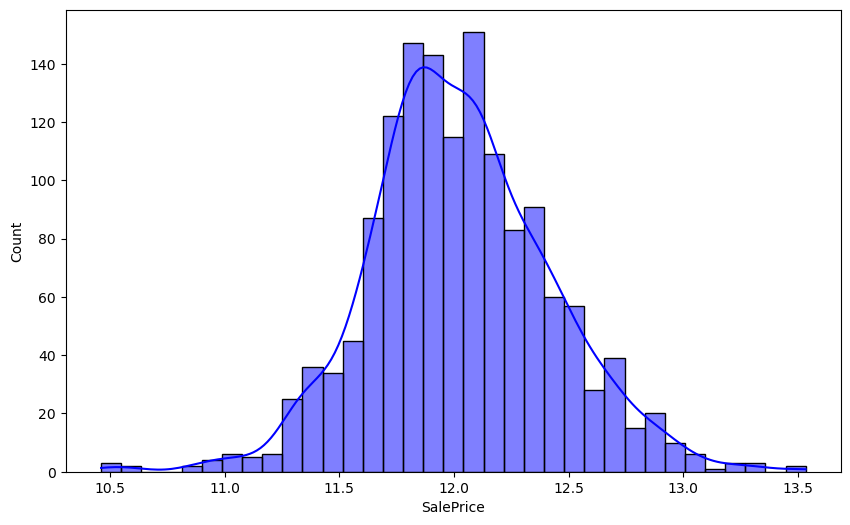

In [10]:
# Create a figure with specified size (10 inches width, 6 inches height)
plt.figure(figsize=(10, 6))
# Create a histogram of the 'SalePrice' column from train_df
# kde=True adds a kernel density estimate curve
# color='blue' sets the histogram color to blue
sns.histplot(train_df['SalePrice'], kde=True, color='blue')
# Display the plot
plt.show()

In [11]:
# Calculate the percentage of missing values for each column in train_df
missing_percent = train_df.isnull().mean().sort_values(ascending=False) * 100
# Filter to show only columns that have missing values (percentage > 0)
missing_percent[missing_percent > 0]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

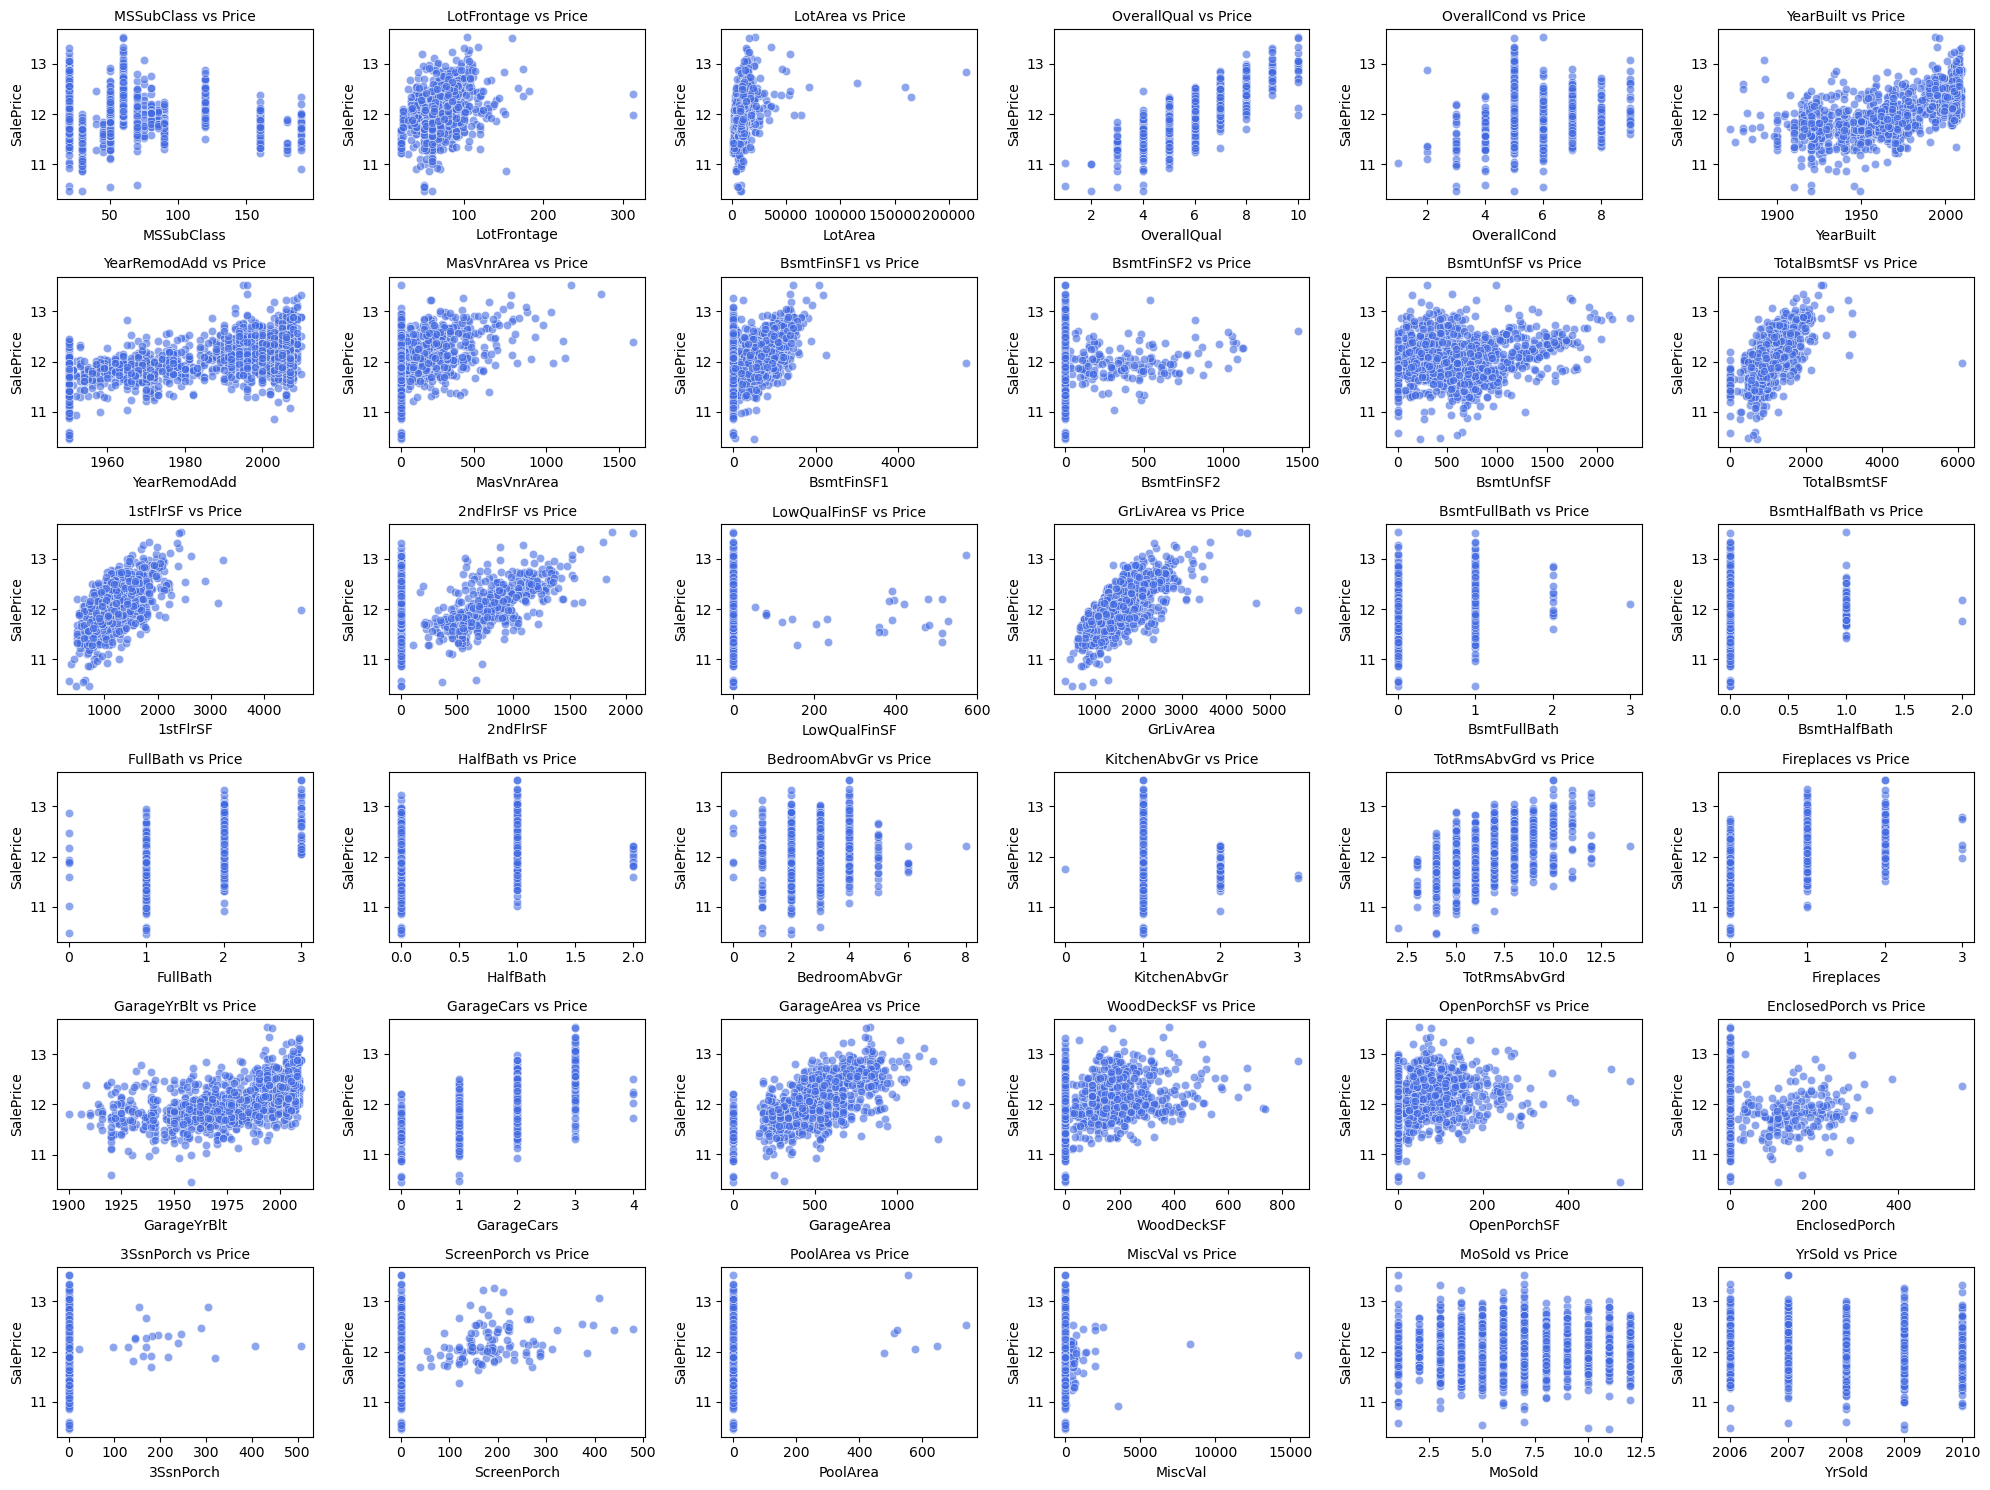

In [12]:
# Get all numeric columns from the training dataframe
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Create a large figure to hold multiple subplots
plt.figure(figsize=(20, 15))

# Loop through each numeric column to create a scatter plot against SalePrice
for i, col in enumerate(numeric_cols):
    # Skip the SalePrice and Id columns
    if col != 'SalePrice' and col != 'Id':
     # Create a subplot in a 6x6 grid at position i+1
        plt.subplot(6, 6, i)  
        # Create scatter plot showing relationship between the numeric feature and SalePrice
        sns.scatterplot(x=train_df[col], y=train_df['SalePrice'], alpha=0.6, color='royalblue')
        # Add title to each subplot
        plt.title(f'{col} vs Price', fontsize=10)
        # Adjust layout to prevent overlap
        plt.tight_layout()

# Display all the subplots
plt.show()

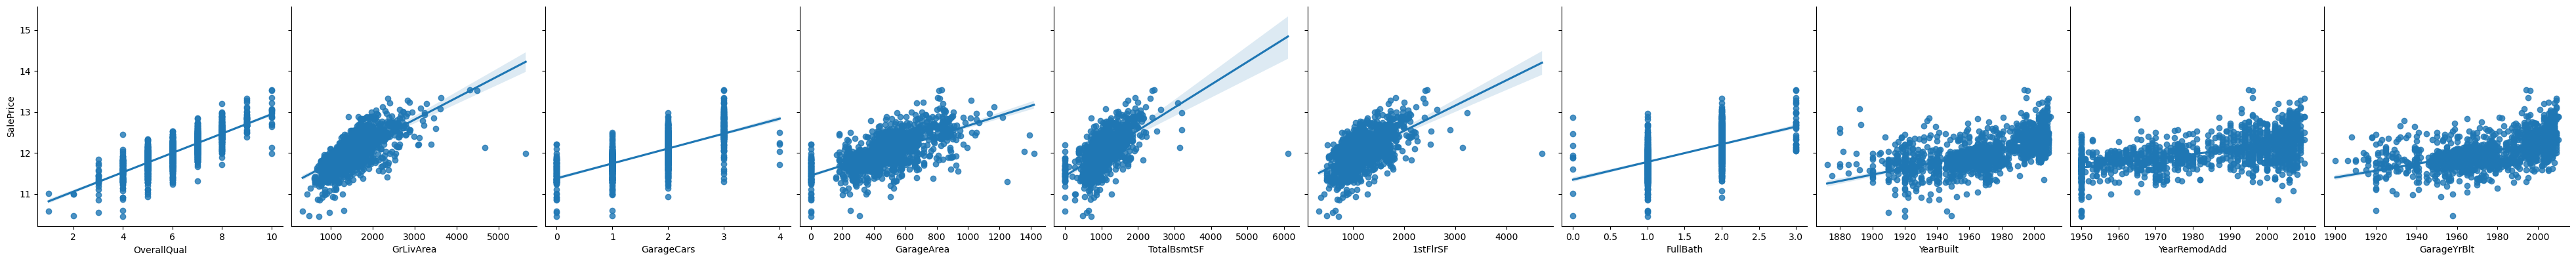

In [13]:
# Calculate correlation of all numeric columns with SalePrice and sort in descending order
corr_with_price = train_df[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)

# Select the top 10 features most correlated with SalePrice (excluding SalePrice itself)
top_features = corr_with_price.index[1:11]  

# Create a pairplot showing the relationship between SalePrice and the top 10 correlated features
# Each subplot shows a regression line to visualize the linear relationship
sns.pairplot(train_df, y_vars=['SalePrice'], x_vars=top_features, kind='reg', height=4)
plt.show()

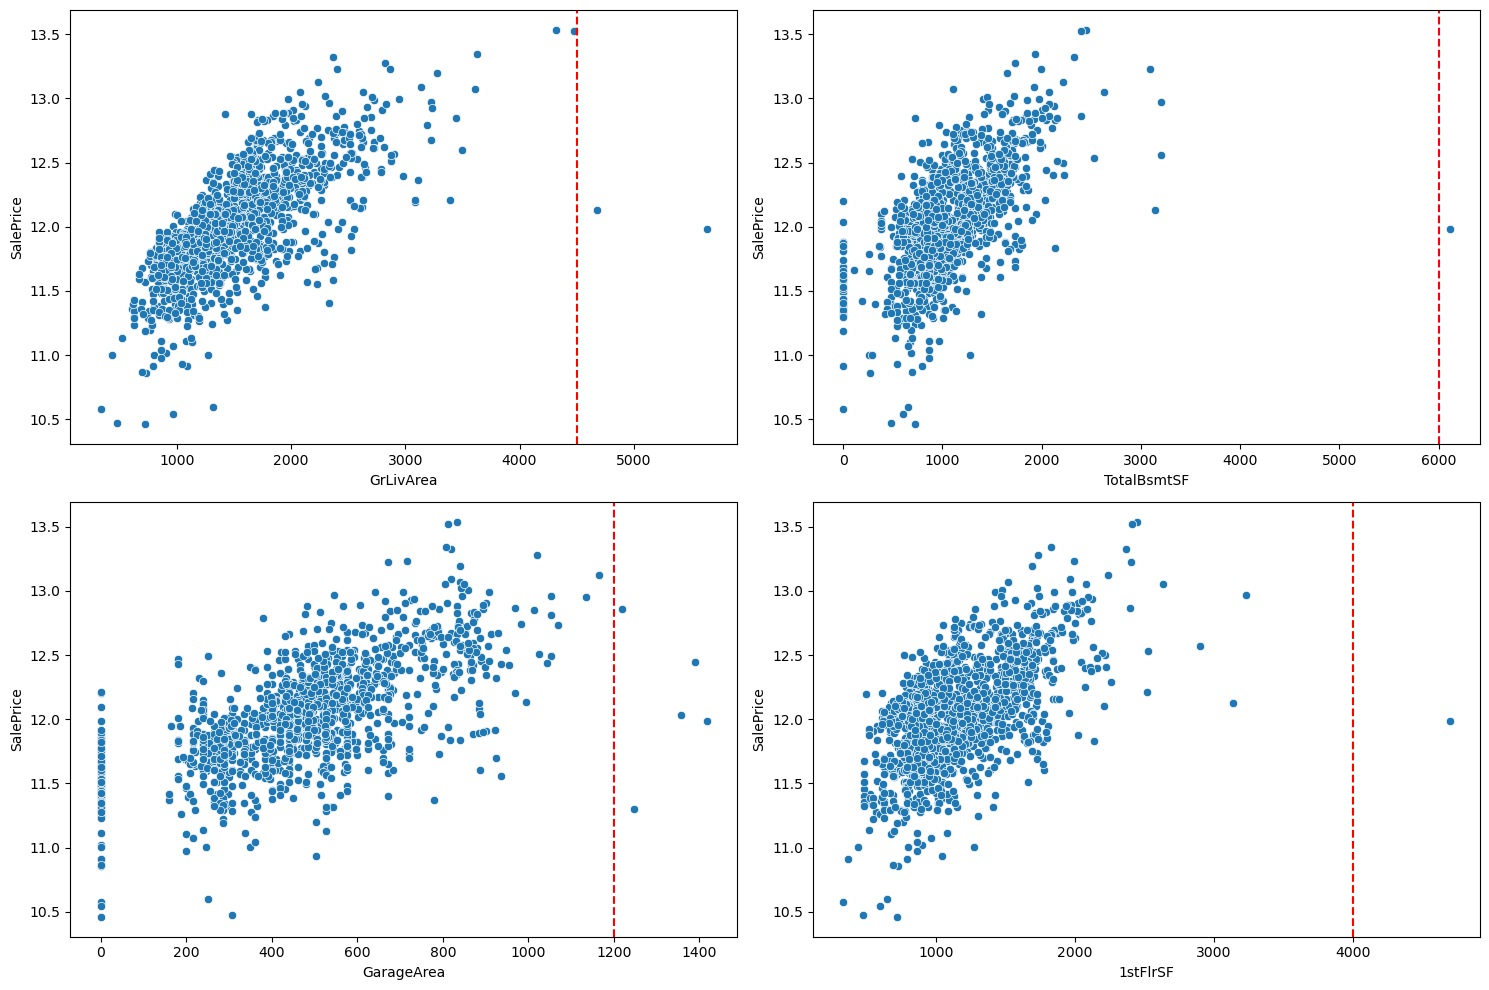

In [14]:
# Create a 2x2 grid of subplots with a figure size of 15x10 inches
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Scatter plot of GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df, ax=axes[0,0])
axes[0,0].axvline(4500, color='r', linestyle='--')  # Add vertical line at x=4500 to identify outliers

# Plot 2: Scatter plot of TotalBsmtSF vs SalePrice
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df, ax=axes[0,1])
axes[0,1].axvline(6000, color='r', linestyle='--')  # Add vertical line at x=6000 to identify outliers

# Plot 3: Scatter plot of GarageArea vs SalePrice
sns.scatterplot(x='GarageArea', y='SalePrice', data=train_df, ax=axes[1,0])
axes[1,0].axvline(1200, color='r', linestyle='--')  # Add vertical line at x=1200 to identify outliers

# Plot 4: Scatter plot of 1stFlrSF vs SalePrice
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train_df, ax=axes[1,1])
axes[1,1].axvline(4000, color='r', linestyle='--')  # Add vertical line at x=4000 to identify outliers

# Adjust spacing between subplots for better visualization
plt.tight_layout()
# Display the plots
plt.show()

In [15]:
# Remove outliers by filtering out extreme values
train_df = train_df[train_df['GrLivArea'] < 4500]  # Filter out houses with above-ground living area > 4500 sq ft
train_df = train_df[train_df['TotalBsmtSF'] < 6000]  # Filter out houses with basement area > 6000 sq ft
train_df = train_df[train_df['GarageArea'] < 1200]  # Filter out houses with garage area > 1200 sq ft
train_df = train_df[train_df['1stFlrSF'] < 4000]  # Filter out houses with first floor area > 4000 sq ft
print(len(train_df))  # Print the number of remaining samples after outlier removal

1454


In [16]:
# Drop columns with high percentage of missing values to simplify the dataset
# These columns include pool quality, miscellaneous features, alley access, fence quality,
# various garage and basement characteristics, and other features that may not be critical
# for the model or have too many missing values to be useful
train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'GarageYrBlt', 
                       'GarageCond', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 
                       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'LotFrontage', 'GarageType', 
                       'FireplaceQu'], axis=1, inplace=True)

In [17]:
test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'GarageYrBlt', 'GarageCond', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'LotFrontage', 'GarageType', 'FireplaceQu'], axis=1, inplace=True)

In [18]:
# Remove rows with missing values in the 'Electrical' column
train_df.dropna(subset=['Electrical'], inplace=True)
# Fill missing values in 'MasVnrArea' with 0 (assuming missing means no masonry veneer)
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

In [19]:
# Fill missing values in 'MasVnrArea' column with 0
# Note: fillna() with inplace=True returns None, so this assignment will make test_df['MasVnrArea'] = None
# Better approach would be: test_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0, inplace=True)

C:\Users\shaya\AppData\Local\Temp\ipykernel_25660\3901844921.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0, inplace=True)


In [20]:
# Calculate the percentage of missing values for each column in train_df
missing_percent = train_df.isnull().mean().sort_values(ascending=False) * 100
# Filter to show only columns that have at least one missing value (percentage > 0)
missing_percent[missing_percent > 0]

Series([], dtype: float64)

In [21]:
# Get all categorical columns from the training dataframe
# This selects columns with data types 'object' or 'category'
cat_cols = train_df.select_dtypes(include=['object', 'category'])
# Print the list of categorical column names
print(list(cat_cols))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [22]:
from sklearn.preprocessing import LabelEncoder

# Define columns with ordinal categorical values that need encoding
ordinal_cols = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']

# Loop through each ordinal column and apply label encoding
for col in ordinal_cols:
    # Initialize a new LabelEncoder for each column
    le = LabelEncoder()
    # Transform categorical values to numeric values (e.g. 'Ex' -> 0, 'Gd' -> 1, etc.)
    train_df[col] = le.fit_transform(train_df[col])

In [23]:
# Define a list of nominal (categorical) columns that need to be one-hot encoded
nominal_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

# Convert all nominal columns to dummy/indicator variables (one-hot encoding)
# drop_first=True removes the first category to avoid the dummy variable trap (multicollinearity)
train_df = pd.get_dummies(train_df, columns=nominal_cols, drop_first=True)

In [24]:
# Process ordinal columns by converting categorical values to numeric using LabelEncoder
for col in ordinal_cols:
    le = LabelEncoder()
    test_df[col] = le.fit_transform(test_df[col])

# Convert nominal columns to one-hot encoded columns (dummy variables)
# drop_first=True removes the first category to avoid multicollinearity
test_df = pd.get_dummies(test_df, columns=nominal_cols, drop_first=True)

# Align train and test dataframes to ensure they have the same columns
# join='left' keeps all columns from train_df
# fill_value=0 fills any missing columns in test_df with zeros
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

In [25]:
# Print the number of columns in the training dataframe
print(train_df.shape[1])
# Print the number of columns in the test dataframe
print(test_df.shape[1])
# Display the first 5 values of the 'SalePrice' column from the training dataframe
train_df['SalePrice'].head()
# Remove the 'SalePrice' column from the test dataframe
test_df = test_df.drop("SalePrice", axis='columns')

183
183


In [26]:
print(train_df['ExterQual'].head())

0    2
1    3
2    2
3    3
4    2
Name: ExterQual, dtype: int32


In [27]:
# Create a new feature 'TotalSF' by summing the square footage from first floor,
# second floor, and basement for both training and test datasets
train_df['TotalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['TotalBsmtSF']
test_df['TotalSF'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['TotalBsmtSF']

In [28]:
# Calculate bathroom to bedroom ratio (full bathrooms + half of half bathrooms divided by bedrooms)
train_df['BathroomRatio'] = (train_df['FullBath'] + 0.5 * train_df['HalfBath']) / train_df['BedroomAbvGr']
test_df['BathroomRatio'] = (test_df['FullBath'] + 0.5 * train_df['HalfBath']) / test_df['BedroomAbvGr']

# Replace infinite values (caused by division by zero when BedroomAbvGr=0) with 1
train_df['BathroomRatio'] = train_df['BathroomRatio'].replace([np.inf, -np.inf], 1)
test_df['BathroomRatio'] = test_df['BathroomRatio'].replace([np.inf, -np.inf], 1)

In [29]:
# Calculate the age of each house by subtracting the year it was built from the year it was sold
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

In [30]:
# Create a list of new features we want to analyze
new_features = ['TotalSF', 'BathroomRatio', 'HouseAge']
# Display descriptive statistics for these new features in the training dataset
# This will show count, mean, std, min, 25%, 50%, 75%, max for each feature
print(train_df[new_features].describe())

           TotalSF  BathroomRatio     HouseAge
count  1453.000000    1451.000000  1453.000000
mean   2555.844460       0.642201    36.639367
std     772.680454       0.256378    30.234016
min     334.000000       0.000000     0.000000
25%    2010.000000       0.500000     8.000000
50%    2473.000000       0.625000    35.000000
75%    3000.000000       0.833333    54.000000
max    6872.000000       2.000000   136.000000


In [31]:
# Define a list of columns to be removed from the dataset
columns_to_drop = ['YearBuilt', 'YrSold', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 
                  'FullBath', 'HalfBath', 'BedroomAbvGr']

# Remove the specified columns from the training dataset (modifying the original dataframe)
train_df.drop(columns=columns_to_drop, axis=1, inplace=True)
# Remove the same columns from the test dataset (modifying the original dataframe)
test_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Print the number of columns remaining in the training dataset after dropping columns
print(train_df.shape[1])

178


In [32]:
# Import StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# Select all numeric columns from the training dataframe
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
# Remove the target variable 'SalePrice' from the list of columns to scale
numeric_cols = numeric_cols.drop('SalePrice')
# Remove the 'Id' column as it's not a feature
numeric_cols = numeric_cols.drop('Id')

# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform it (standardize to mean=0, std=1)
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
# Transform the test data using the same scaler (important to use the same scaling parameters)
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Display the first few rows of selected scaled features to verify the transformation
print(train_df[['TotalSF', 'BathroomRatio', 'HouseAge']].head())

    TotalSF  BathroomRatio  HouseAge
0  0.013148       0.745767 -1.046843
1 -0.041227       0.095462 -0.186588
2  0.194398       0.745767 -0.980669
3 -0.107254      -1.205149  1.798615
4  1.019084      -0.067115 -0.947583


In [33]:
# Prepare training features by removing ID and target columns
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
# Extract target variable (house prices) for training
y_train = train_df['SalePrice']
# Prepare test features by removing only the ID column (test set has no target)
X_test = test_df.drop('Id', axis=1)

In [34]:
# Split the training data into training and validation sets
# This helps evaluate model performance on unseen data during development
from sklearn.model_selection import train_test_split

# Split data with 80% for training and 20% for validation
# X_train/y_train: features and labels for training
# X_val/y_val: features and labels for validation
# random_state ensures reproducible results
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2, 
    random_state=42
)

# Print the shapes to verify the split dimensions
print(X_train.shape)
print(X_val.shape)

(1162, 176)
(291, 176)


In [35]:
# Import XGBoost and evaluation metric from scikit-learn
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize XGBoost regressor with hyperparameters
model = xgb.XGBRegressor(
    n_estimators=1000,    # Maximum number of trees to build
    learning_rate=0.01,   # Small learning rate for better generalization
    max_depth=3,          # Shallow trees to prevent overfitting
    subsample=0.8,        # Use 80% of data for each tree (prevents overfitting)
    colsample_bytree=0.8, # Use 80% of features for each tree (prevents overfitting)
    random_state=42,      # Set seed for reproducibility
    early_stopping_rounds=20  # Stop training if no improvement after 20 rounds
)

# Train the model using training data and validate on validation set
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Validation set for early stopping
    verbose=10                  # Print training progress every 10 iterations
)

# Make predictions on validation set
preds = model.predict(X_val)
# Calculate Root Mean Squared Error to evaluate model performance
rmse = np.sqrt(mean_squared_error(y_val, preds))
print(f"\nRMSE نهایی: {rmse:.4f}")  # Print final RMSE (in Persian: "Final RMSE")

[0]	validation_0-rmse:0.41082
[10]	validation_0-rmse:0.38310
[20]	validation_0-rmse:0.35771
[30]	validation_0-rmse:0.33505
[40]	validation_0-rmse:0.31493
[50]	validation_0-rmse:0.29705
[60]	validation_0-rmse:0.28169
[70]	validation_0-rmse:0.26694
[80]	validation_0-rmse:0.25408
[90]	validation_0-rmse:0.24284
[100]	validation_0-rmse:0.23263
[110]	validation_0-rmse:0.22331
[120]	validation_0-rmse:0.21515
[130]	validation_0-rmse:0.20798
[140]	validation_0-rmse:0.20103
[150]	validation_0-rmse:0.19501
[160]	validation_0-rmse:0.18944
[170]	validation_0-rmse:0.18418
[180]	validation_0-rmse:0.17954
[190]	validation_0-rmse:0.17531
[200]	validation_0-rmse:0.17143
[210]	validation_0-rmse:0.16771
[220]	validation_0-rmse:0.16434
[230]	validation_0-rmse:0.16161
[240]	validation_0-rmse:0.15910
[250]	validation_0-rmse:0.15674
[260]	validation_0-rmse:0.15456
[270]	validation_0-rmse:0.15256
[280]	validation_0-rmse:0.15054
[290]	validation_0-rmse:0.14889
[300]	validation_0-rmse:0.14733
[310]	validation_0-

In [36]:
#final_preds = model.predict(X_test)

#final_preds = np.expm1(final_preds)

#submission = pd.DataFrame({'Id': test_df['Id'].astype('int32'), 'SalePrice': final_preds})
#submission.to_csv('C:/Users/shaya/Downloads/Compressed/house-prices-advanced-regression-techniques/final_submission.csv', index=False)